In [1]:
from selenium import webdriver

In [2]:
!pip install selenium

<html lang="ko" data-dark="false" data-useragent="Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.183 Safari/537.36"><head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"> <meta name="robots" content="index,nofollow"> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobile/ed
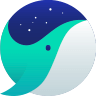
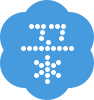

In [18]:
from selenium import webdriver

driver = webdriver.Chrome('c:/chromedriver')

url = 'https://www.naver.com/'

# time.sleep(3)

driver.implicitly_wait(3)
driver.get(url)

html = driver.page_source

print(html)

In [27]:
from bs4 import BeautifulSoup

html1 = """
<!DOCTYPE html>
<html>
    <head>
    </head>
    <body>
        <h1> 우리동네시장</h1>
            <div class = 'sale'>
                <p id='fruits1' class='fruits'>
                    <span class = 'name'> 바나나 </span>
                    <span class = 'price'> 3000원 </span>
                    <span class = 'inventory'> 500개 </span>
                    <span class = 'store'> 가나다상회 </span>
                    <a href = 'http://bit.ly/forPlaywithData' > 홈페이지 </a>
                </p>
            </div>
            <div class = 'prepare'>
                <p id='fruits2' class='fruits'>
                    <span class ='name'> 파인애플 </span>
                </p>
            </div>
    </body>
</html>
"""

#### select

In [60]:
# 바나나 뽑아보세요
# 파인애플 뽑아보세요
# 3000원 뽑아보세요
# a href 속성 뽑아보세요

soup = BeautifulSoup(html1, "lxml")

bananas = soup.select("div.sale span.name")
for banana in bananas:
    print(banana.text)
    
pineapples = soup.select("div.prepare span.name")
for pineapple in pineapples:
    print(pineapple.text)
    
price_3000s = soup.select("div.sale span.price")
for price_3000 in price_3000s:
    print(price_3000.text)
    
link = soup.select("a")
link_url = link[0].get("href")
print(link_url)

 바나나 
 파인애플 
 3000원 
http://bit.ly/forPlaywithData


In [77]:
soup = BeautifulSoup(html1, "lxml")

banana = soup.select_one("div.sale span.name")
print(banana.text)
    
pineapple = soup.select_one("div.prepare span.name")
print(pineapple.text)
    
price_3000 = soup.select_one("div.sale span.price")
print(price_3000.text)
    
link = soup.select("a")
link_url = link[0].get("href")
print(link_url)

 바나나 
 파인애플 
 3000원 
http://bit.ly/forPlaywithData


#### find

In [73]:
soup = BeautifulSoup(html1, "lxml")

fruit = soup.find_all('span', {"class":"name"})
print(fruit)

banana = fruit[0].get_text()
print(banana)

pineapple = fruit[1].get_text()
print(pineapple)

price_3000 = soup.find('span', {"class":"price"}).get_text()
print(price_3000)

link = soup.find("a").get("href")
print(link)

[<span class="name"> 바나나 </span>, <span class="name"> 파인애플 </span>]
 바나나 
 파인애플 
 3000원 
http://bit.ly/forPlaywithData


In [84]:
html1 = """
<!DOCTYPE html>
<html>
    <head>
    </head>
    <body>
        <h1> 우리동네시장</h1>
            <div class = 'sale'>
                <p id='fruits1' class='fruits'>
                    <span class = 'name'> 바나나 </span>
                    <span class = 'price'> 3000원 </span>
                    <span class = 'inventory'> 500개 </span>
                    <span class = 'store'> 가나다상회 </span>
                    <a href = 'http://bit.ly/forPlaywithData' > 홈페이지 </a>
                </p>
            </div>
            <div class = 'prepare'>
                <p id='fruits2' class='fruits'>
                    <span class ='name'> 파인애플 </span>
                </p>
            </div>
    </body>
</html>
"""

from bs4 import BeautifulSoup

soup = BeautifulSoup(html1, "lxml")

tags_span = soup.select('span')
tags_p = soup.select('p')

ids_fruits1 = soup.select('#fruits1') # id
class_price = soup.select('.price') # class

tags_span_class_price = soup.select('span.price') # span 태그 같은 줄의 class

tags_name = soup.select('span.name')
# print(tags_name)

tags_banana1 = soup.select('#fruits1 > span.name')
# print(tags_banana1)

tags_banana2 = soup.select('div.sale > #fruits1 > span.name')
# print(tags_banana2)

tags_banana3 = soup.select('div.sale span.name')
# print(tags_banana3)

tags = soup.select('span.name')
tag_1 = tags[0] 
# print(tag_1)

tags = soup.select('span.name')
for tag in tags:
    print(tag)

<span class="name"> 바나나 </span>
<span class="name"> 파인애플 </span>


In [85]:
tags = soup.select('a')
tag = tags[0]
content = tag.text
print(content)
link = tag['href']
print(link)

 홈페이지 
http://bit.ly/forPlaywithData
